# Exploratory Data Analysis

## Reading Files into Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
data = pd.read_csv('datasets\churn_prediction.csv')

In [ ]:
#first 5 instances using "head()" function
data.head()

In [ ]:
#last 5 instances using "tail()" function
data.tail()

In [3]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(28382, 21)

In [4]:
#Printing all the columns present in data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

## Variable Identification and Typecasting

In [ ]:
# A closer look at the data types present in the data
data.dtypes

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


### Integer Data Type

In [ ]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

Summary:

*    **Customer id** are a unique number assigned to customers. It is are **Okay as Integer**.

*    **branch code** again represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


In [5]:
# converting churn to category
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

### Float Data Type

In [ ]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

Summary:

*    **dependents** is expected to be a whole number. **Should be changed to integer type**

*    **city** variable is also a unique code of a city represented by some interger number. **Should be converted to Category type**

*    Rest of the variables like **credit, balance and debit** are best represented by the float variables.

In [6]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

### Object Data Type

In [ ]:
data.dtypes

*    **variables like 'gender', 'occupation' and 'last_transaction' are of type object**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [ ]:
# Manually checking object types
data[['gender','occupation','last_transaction']].head(7)

*    **gender** and **occupation** variables **belong to categorical data types**.
*    **last_transaction** should be a  **datetime variable**.

In [7]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

### datetime Data Type

In [8]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [9]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

E:\Anaconda3\envs\ml_3.6\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


In [10]:
# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.



In [ ]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

## Univariate Analysis: Numerical Variables

In [11]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [12]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [16]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):

  #Univariate_Analysis_numeric
  #takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  #Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  #'''

    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
    for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
    # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### customer_information

mini = 1
maxi = 30301


E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\

mini = 1
maxi = 90


E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\

mini = 73
maxi = 2476


E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\

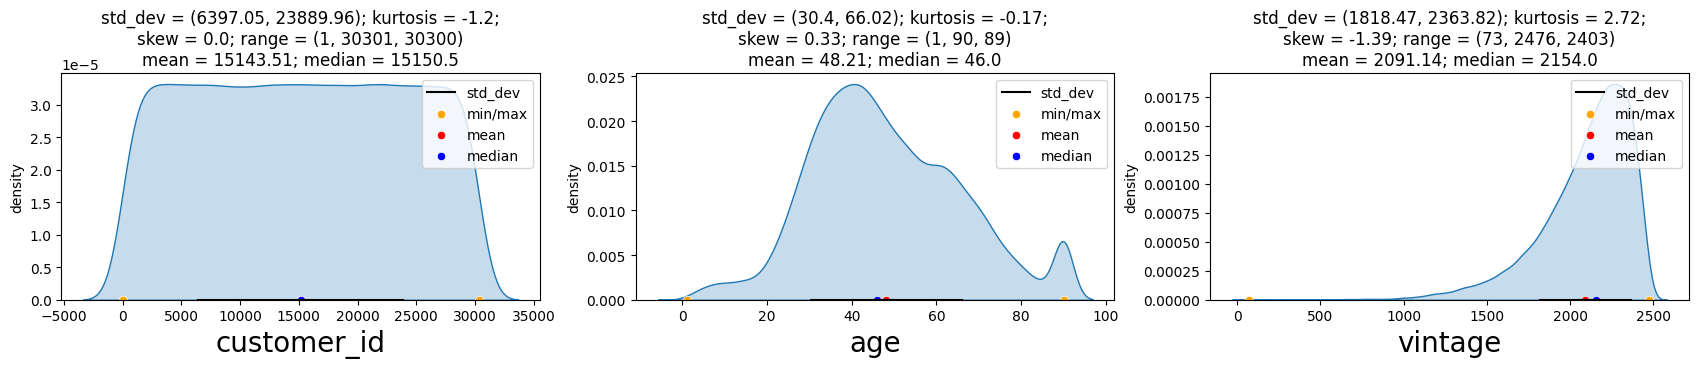

In [17]:
UVA_numeric(data,customer_details)

**Summary of Customer_Information:**
*    **customer_id**:
     *    variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
*    **vintage:**
    *    Most customers joined between 2100 and 2650 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

### current_month

In [ ]:
UVA_numeric(data,current_month)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are obvious.


**Need to Remove Outliers to visulaise these plots**

In [ ]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

In [ ]:
UVA_numeric(cm_data,current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there thete any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performinng high amount of transactions, are they doinng it every month?**

### previous_month

In [ ]:
UVA_numeric(data,previous_month)

**Summary of previous_month**
*    This looks very similar to current_month. Most of the customers perform low amount transactions.

### previous_quarters

In [ ]:
UVA_numeric(data,previous_quarters)

**Summary**
The general trend still follows, it is crutial that we find the out if there is any common trait between the customers doing high high amount of transactions.

### transaction_date

In [ ]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

## Univariate Analysis : Categorical Varibales

In [ ]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

**Grouping Varibales**

* **customer_info**: gender, occupation, customer_nw_category
* **account_info**: city, branch_code
* **churn**

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### customer_info

In [ ]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### account_info

In [ ]:
UVA_category(data, ['city', 'branch_code'])

In [ ]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

In [ ]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

**Summary:**
for both variable "city" and "branch_code", there are too many categories. There is clear relation that some branches and cities are more popular with customers and and this trend decreases rapidly.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

### churn

In [ ]:
UVA_category(data, ['churn'])

**Summary**
* Number of people who churned are 1/4 times of the people who did not churn in the given data.

## Univariate: Missing Values

In [ ]:
# finding number of missing values in every variable
data.isnull().sum()

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


## Univariate Analysis: Outliers

**We suspected outliers in current_month and previous_month variable groups. We will verify that using bo plots**

In [19]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### current_month and previous_month

True
True
True


E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_war

True


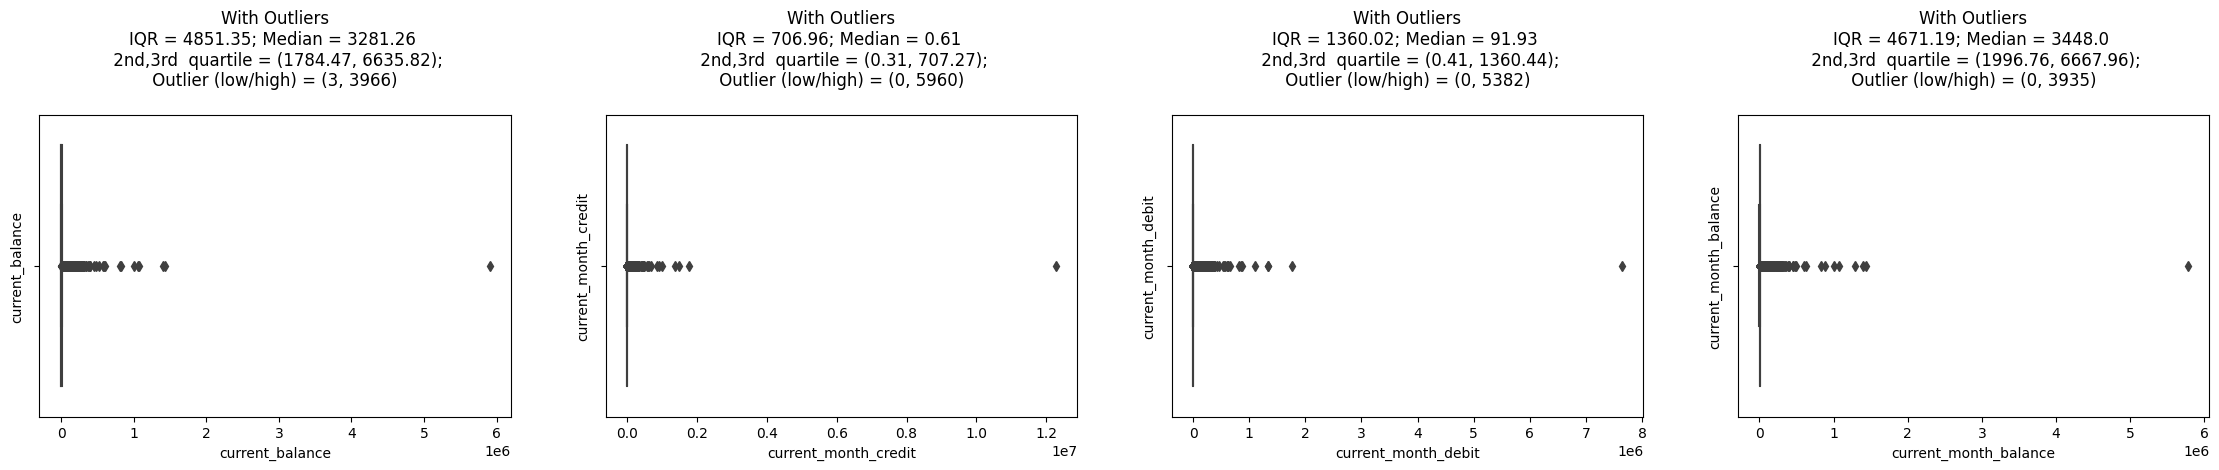

In [20]:
UVA_outlier(data, current_month,)

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_war

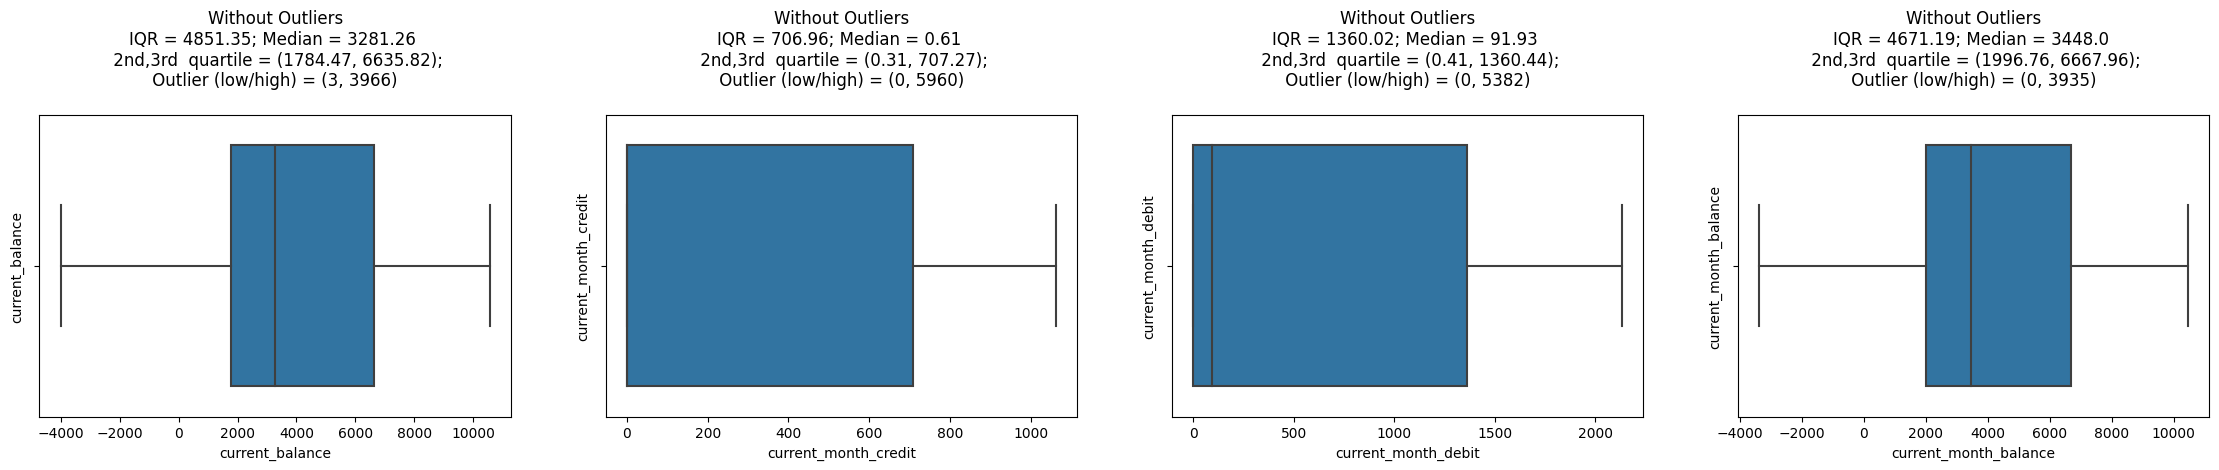

In [21]:
UVA_outlier(data, current_month, include_outlier=False)

True
True
True
True


E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_war

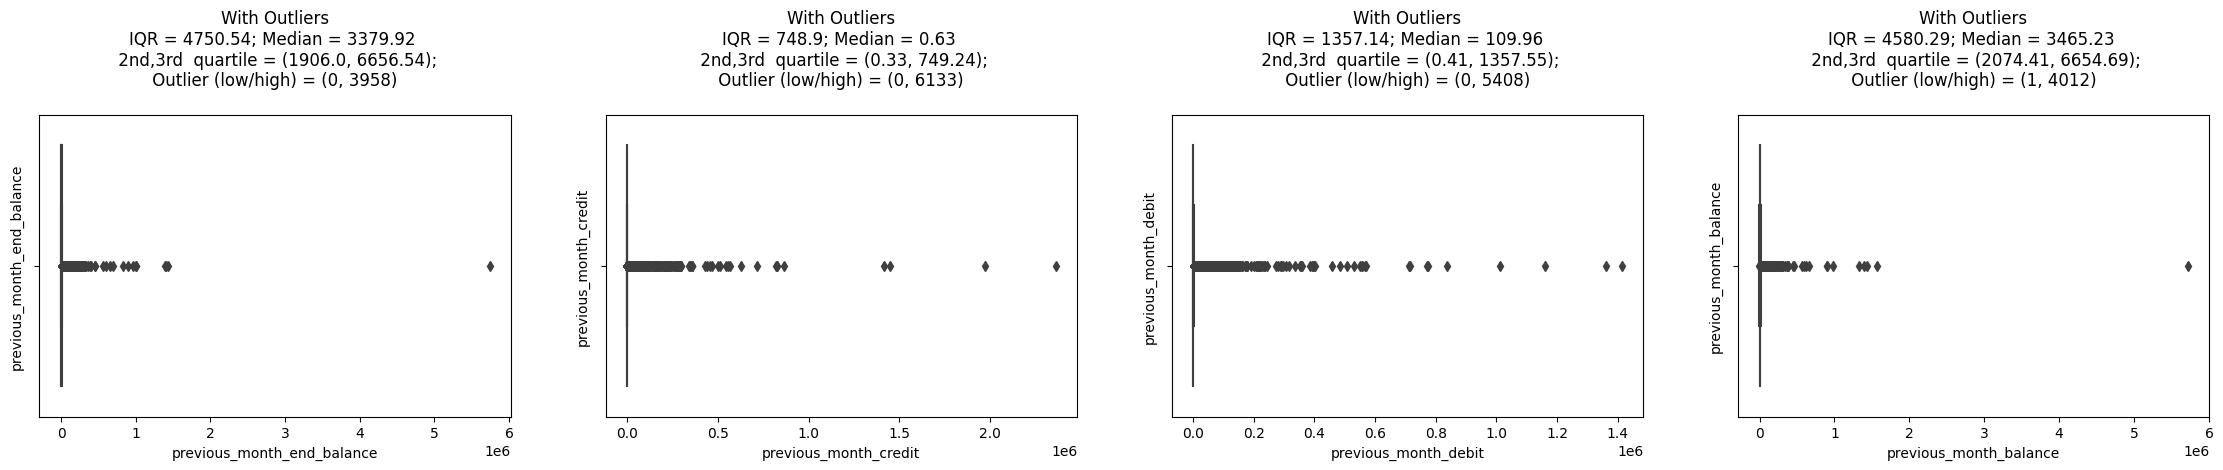

In [22]:
UVA_outlier(data, previous_month)

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_war

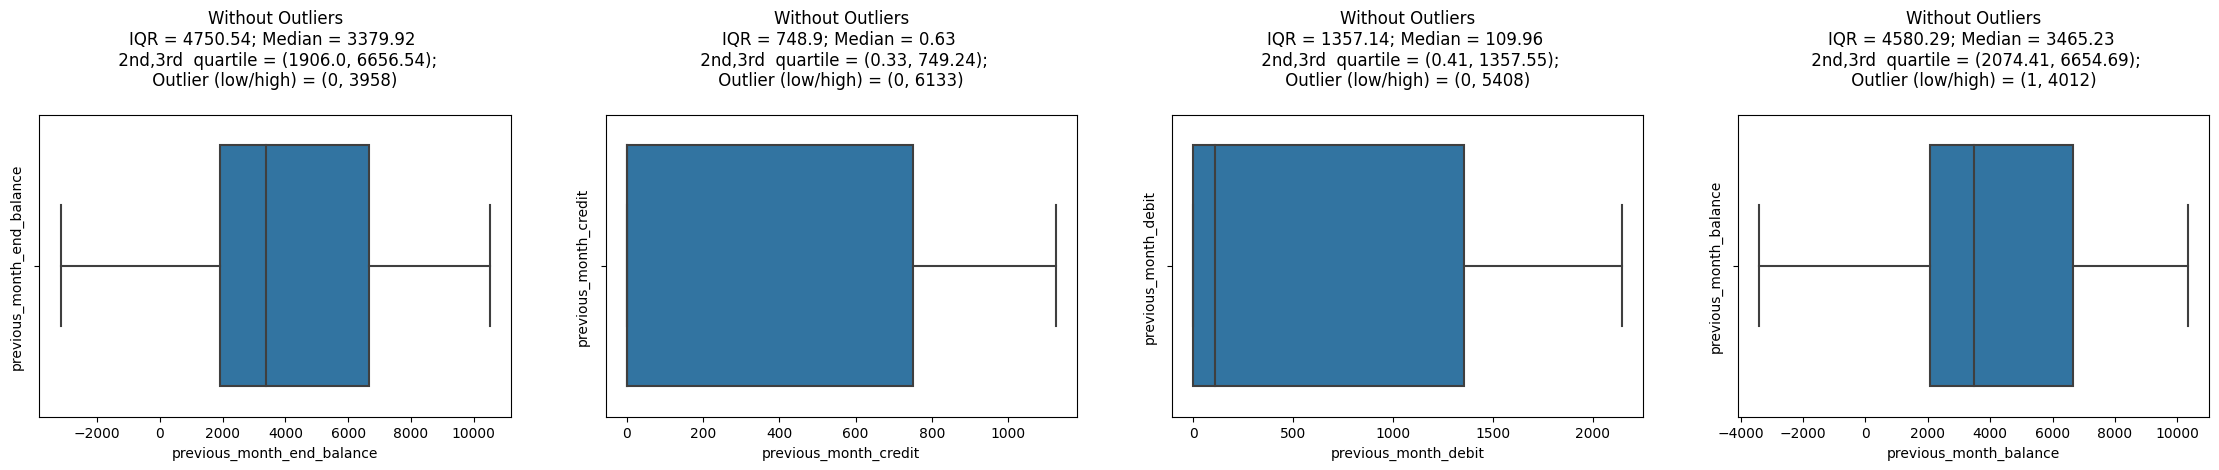

In [23]:
UVA_outlier(data, previous_month, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

### previous quarters

In [18]:
UVA_outlier(data,previous_quarters)

NameError: name 'UVA_outlier' is not defined

In [ ]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.


## Bivariate Analysis